In [2]:
from os.path import join
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

DATA_FOLDER='data_templates/'
POKEMON_FILE=join(DATA_FOLDER,'pokemon.csv')
COMBATS_FILE=join(DATA_FOLDER,'combats.csv')

df_pokemons=pd.read_csv(POKEMON_FILE,index_col=0)
df_combats=pd.read_csv(COMBATS_FILE)

# Crosstab of two categorical features

Total number of classes is 18


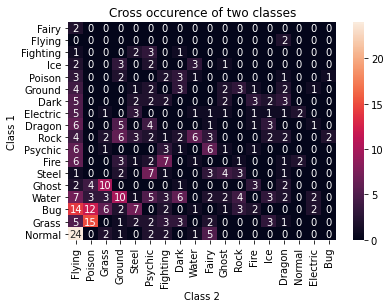

In [3]:
def get_crosstab(df,column_1,column_2):
    #Build a crosstab
    df2=pd.crosstab(df[column_1],df[column_2])
    
    #Columns indexing so the highest numbers are in the left
    cols=df2.max(axis=0).sort_values(ascending=False).index
    
    #Rows indexing so the highest numbers are in the bottom
    rows=df2.max(axis=1).sort_values(ascending=True).index
    
    df2=df2[cols].reindex(index=rows)
    
    sns.heatmap(df2,annot=True)
    plt.title('Cross occurence of two classes')
    
    #Names presented in both classes 
    common_labels=np.intersect1d(df2.index,df2.columns)
    
    #Names presented in either of 2 classes
    add_columns=np.setdiff1d(df2.columns,df2.index)
    add_rows=np.setdiff1d(df2.index,df2.columns)
    
    print('Total number of classes is %d' % (len(common_labels)+len(add_columns)+len(add_rows)))
    if len(add_rows)>0:
        print('%d belongs only to Class 1' % len(add_rows))
    if len(add_columns)>0:
        print('%d belongs only to Class 2' % len(add_columns))
    
    return df2
classes_df=get_crosstab(df_pokemons,'Class 1','Class 2')

# Description and barplots for numerical features

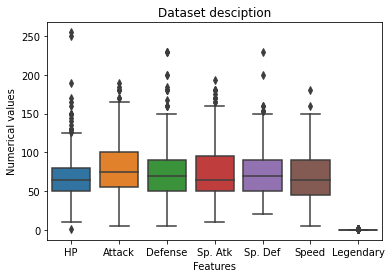

In [5]:
def describe_df(df):
    sns.boxplot(data=df)
    plt.title('Dataset desciption')
    plt.ylabel('Numerical values')
    plt.xlabel('Features')
    plt.show()
    return df.describe()

_=describe_df(df_pokemons)

# Comparison of two plots

# Barplots for mean and CI

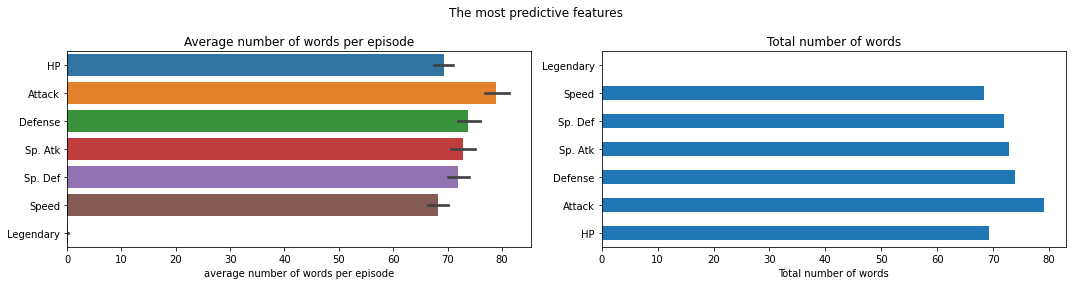

In [17]:
fig,ax=plt.subplots(1,2,figsize=(15,4))

fig.suptitle('The most predictive features')

sns.barplot(ax=ax[0],data=df_pokemons,orient='h')
plt.title('Average number of words per episode')

ax[0].set_xlabel('average number of words per episode')
ax[0].set_title('Average number of words per episode')

df_pokemons.mean().plot.barh(ax=ax[1])
ax[1].set_xlabel('Total number of words')
ax[1].set_title('Total number of words')

plt.tight_layout()
plt.show()

# Relation of two numerical features

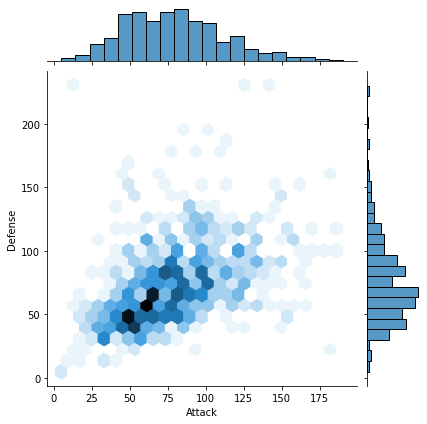

In [7]:
sns.jointplot(data=df_pokemons,x='Attack',y='Defense',kind='hex')

# Histograms

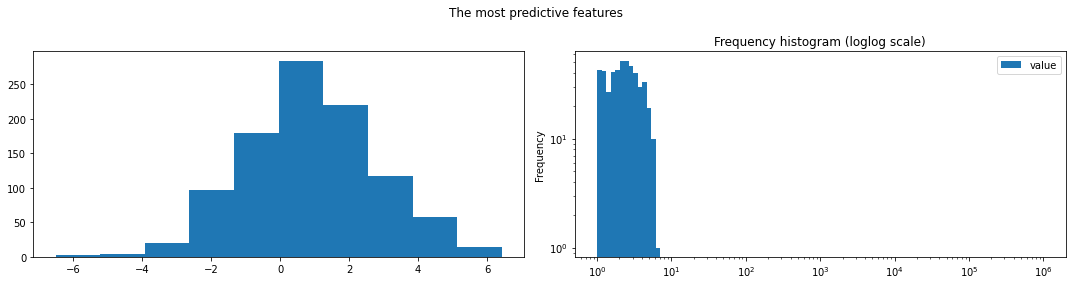

In [25]:
fig,ax=plt.subplots(1,2,figsize=(15,4))

fig.suptitle('The most predictive features')

n,bins,_=ax[0].hist(q.value)

q.plot.hist(ax=ax[1],by="Frequency", loglog=True, bins=np.logspace(0, 6, 100),
                           title="Frequency histogram (loglog scale)");

plt.tight_layout()
plt.show()